# import the dependencies

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Load Data

In [3]:
data_embed = pd.read_csv("./term_embeddings/vectorized_term_embeddings_4k.csv")
data_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.235717,-0.034357,0.059340,0.297741,0.413503,-0.005965,0.053272,-0.109700,0.191787,0.184964,...,0.222023,-0.038877,-0.471914,0.768315,-0.488685,0.120664,0.782061,-0.179443,-0.428450,0.461683
1,-0.178516,0.002904,0.131155,0.332376,0.247463,0.099109,-0.000515,0.026755,0.152213,0.175770,...,0.283444,-0.155591,-0.345533,0.806833,-0.311759,0.207827,0.600389,-0.149813,-0.418629,0.541288
2,-0.330687,-0.031855,0.105278,0.078271,0.195134,-0.136877,0.117263,-0.054845,0.206244,0.265202,...,0.215846,-0.030670,-0.520877,0.729626,-0.386960,0.177576,0.676565,-0.328219,-0.565267,0.506224
3,-0.281114,-0.042354,0.105358,0.152034,0.230870,-0.142952,0.144465,-0.065642,0.168137,0.245674,...,0.188485,-0.022974,-0.496699,0.746730,-0.406173,0.157490,0.685346,-0.276632,-0.548756,0.495335
4,-0.304600,-0.016233,0.152511,0.173860,0.161872,-0.073577,0.122591,-0.008369,0.165817,0.273474,...,0.204433,-0.045393,-0.448815,0.680492,-0.389678,0.141336,0.665190,-0.325107,-0.504376,0.517802


In [4]:
all_data = pd.read_csv(
    "../tests_17_ann_and_terms/article_v2_2_term_var_to_best_strategy/prepare_data/data_steps/steps_vars_term_str.csv",
    delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(all_data)}")

print(f"max RI steps count: {max(all_data['RI_steps_num'])}")
print(f"max LO steps count: {max(all_data['LO_steps_num'])}")

# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in
               zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

print(f"Count terms data samples: {len(class_RI_LO)}")

Count all terms: 4282
max RI steps count: 1000
max LO steps count: 219
Count terms data samples: 4282


# Some additional code

In [5]:
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(data_embed)

tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data_embed)


def visualize_clusters(model_, clustering_method):
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette="deep")
    plt.title(f'PCA results of {clustering_method}')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend()
    plt.show()

    tsne_df = pd.DataFrame(data=embedded_data, columns=['Dim 1', 'Dim 2'])
    tsne_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dim 1', y='Dim 2', hue='class', data=tsne_df, palette="deep")
    plt.title(f't-SNE results of {clustering_method}')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend()
    plt.show()

In [6]:
pca_3d = PCA(n_components=3)  # Set the number of components as needed
principal_components_3d = pca_3d.fit_transform(data_embed)

tsne_3d = TSNE(n_components=3, random_state=42)
embedded_data_3d = tsne_3d.fit_transform(data_embed)


def visualize_clusters_3d_pca(model_, clustering_method):
    pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        pca_df_3d, x='PC1', y='PC2', z='PC3',
        color='class', title=f"PCA 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()


def visualize_clusters_3d_tsne(model_, clustering_method):
    tsne_df_3d = pd.DataFrame(data=embedded_data_3d, columns=["Dim 1", "Dim 2", "Dim 3"])
    tsne_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        tsne_df_3d, x='Dim 1', y='Dim 2', z='Dim 3',
        color='class', title=f"t-SNE 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()

In [7]:
def draw_metrics(num_clusters, metric_cluster_vals, xlabel="Num clusters", ylabel="Metric", title="Clustering Method"):
    plt.plot(num_clusters, metric_cluster_vals)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} for {title}")

    plt.show()

In [8]:
def draw_metrics_many_norm(num_clusters, metric_cluster_vals_dict: dict, xlabel="Num clusters", ylabel="cl_metric",
                           title="Clustering Method"):
    for name_, metric_cluster_vals in metric_cluster_vals_dict.items():
        metric_cluster_vals = np.array(metric_cluster_vals) / np.max(metric_cluster_vals)
        plt.plot(num_clusters, metric_cluster_vals, label=name_)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend(loc="upper right")
    plt.show()

In [9]:
def wcss_metric(x_data, labels_):
    pd_x_data = x_data.copy(deep=True)
    pd_x_data["class"] = list(labels_)

    wcss = 0.0
    for cl_no in set(list(labels_)):
        cl_x_data = pd_x_data[pd_x_data["class"] == cl_no].drop(["class"], axis=1).reset_index(drop=True)
        cl_center = cl_x_data.mean(axis=0)
        css = 0.0
        for _, cl_x in cl_x_data.iterrows():
            cl_x = np.array(cl_x)
            css += np.sum(np.power(cl_x - cl_center, 2))
        wcss += css

    return wcss

In [10]:
def show_clustering_metrics(x_data, model_):
    print(f"Silhouette Score (MORE): {silhouette_score(x_data, model_.labels_)}")
    print(f"Davies-Bouldin Index (LESS): {davies_bouldin_score(x_data, model_.labels_)}")
    print(f"Calinski-Harabasz Index (MORE): {calinski_harabasz_score(x_data, model_.labels_)}")
    print(f"WCSS (LESS): {wcss_metric(x_data, model_.labels_)}")

In [11]:
from collections import Counter


def calculate_clustering_accuracy(labels_true, labels_pred):
    unique_clusters = np.unique(labels_pred)
    accuracy = 0.0

    for cluster in unique_clusters:
        cluster_indices = np.where(labels_pred == cluster)[0]
        true_labels_in_cluster = labels_true[cluster_indices]

        if len(true_labels_in_cluster) > 0:
            majority_class = Counter(true_labels_in_cluster).most_common(1)[0][0]
            correct_predictions = np.sum(true_labels_in_cluster == majority_class)
            accuracy += correct_predictions / len(true_labels_in_cluster)
    if len(unique_clusters) > 0:
        accuracy /= len(unique_clusters)

    return accuracy

In [12]:
def calculate_clustering_accuracy_per_class(labels_true, labels_pred):
    unique_clusters = np.unique(labels_pred)
    unique_classes = np.unique(labels_true)
    class_accuracies = {key_: 0.0 for key_ in unique_classes}
    
    for u_class in unique_classes:
        accuracy = 0.0
    
        for cluster in unique_clusters:
            cluster_indices = np.where(labels_pred == cluster)[0]
            true_labels_in_cluster = labels_true[cluster_indices]
    
            if len(true_labels_in_cluster) > 0:
                majority_class = Counter(true_labels_in_cluster).most_common(1)[0][0]
                if majority_class == u_class:
                    correct_predictions = np.sum(true_labels_in_cluster == majority_class)
                    accuracy += correct_predictions
        
        class_accuracies[u_class] = accuracy / len(labels_true[np.where(labels_true == u_class)])

    return class_accuracies

# DBSCAN, Euclidean, epsilon=1.25

In [13]:
dbscan_euclid_model = DBSCAN(eps=1.25, min_samples=10, metric="euclidean").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), dbscan_euclid_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), dbscan_euclid_model.labels_))

{'LO < RI': 0.8292275574112735, 'RI < LO': 0.0, 'RI = LO': 0.4224137931034483}
0.8301907672507557


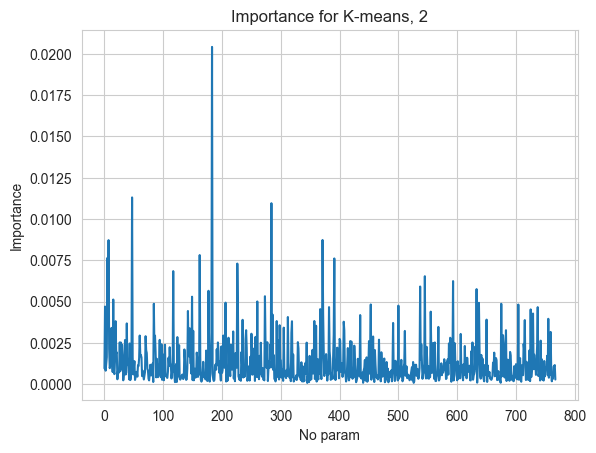

,var_no,inform,cum_inf
183,var_183,0.020425,0.020425
47,var_47,0.011308,0.031733
284,var_284,0.010957,0.042690
371,var_371,0.008731,0.051421
7,var_7,0.008721,0.060141
162,var_162,0.007817,0.067958
5,var_5,0.007643,0.075602
391,var_391,0.007611,0.083213
226,var_226,0.007300,0.090513
117,var_117,0.006844,0.097357


In [18]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(dbscan_euclid_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(dbscan_euclid_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(dbscan_euclid_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)

draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

# DBSCAN, cosine, epsilon=0.00205

In [16]:
dbscan_cos_model = DBSCAN(eps=0.00205, min_samples=10, metric="cosine").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), dbscan_cos_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), dbscan_cos_model.labels_))

{'LO < RI': 0.8275574112734865, 'RI < LO': 0.0, 'RI = LO': 0.393236074270557}
0.8644925224329018


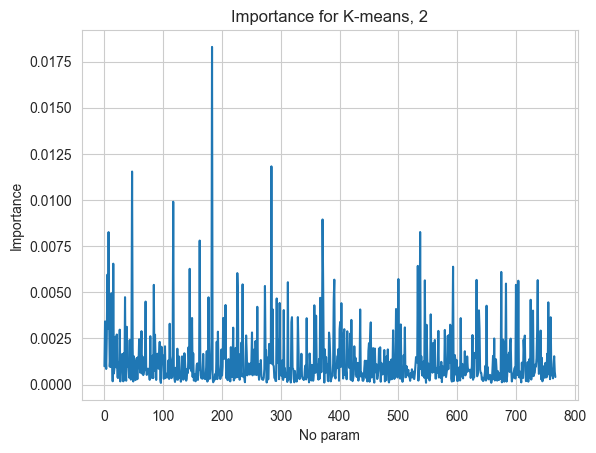

,var_no,inform,cum_inf
183,var_183,0.018292,0.018292
284,var_284,0.011824,0.030116
47,var_47,0.011543,0.041659
117,var_117,0.009909,0.051567
371,var_371,0.008946,0.060514
537,var_537,0.008266,0.068780
7,var_7,0.008262,0.077042
162,var_162,0.007803,0.084845
15,var_15,0.006552,0.091397
533,var_533,0.006432,0.097829


In [19]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(dbscan_cos_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(dbscan_cos_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(dbscan_cos_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)

draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

# Agglomerative, Euclidean, num_clusters=5

In [21]:
agg_euclid_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="complete").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), agg_euclid_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), agg_euclid_model.labels_))

{'LO < RI': 0.644258872651357, 'RI < LO': 0.0, 'RI = LO': 0.7347480106100795}
0.7260306952049111


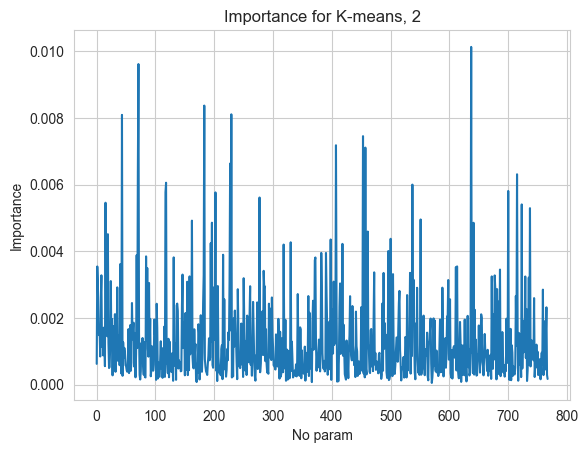

,var_no,inform,cum_inf
637,var_637,0.010124,0.010124
71,var_71,0.009611,0.019735
183,var_183,0.008366,0.028101
229,var_229,0.008104,0.036206
43,var_43,0.008087,0.044293
453,var_453,0.007450,0.051742
407,var_407,0.007177,0.058919
457,var_457,0.007107,0.066026
227,var_227,0.006630,0.072656
70,var_70,0.006342,0.078998


In [22]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(agg_euclid_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(agg_euclid_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(agg_euclid_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)

draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

# Agglomerative, cosine, num_clusters=6

In [23]:
agg_cosine_model = AgglomerativeClustering(n_clusters=6, metric="cosine", linkage="complete").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), agg_cosine_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), agg_cosine_model.labels_))

{'LO < RI': 0.8225469728601252, 'RI < LO': 0.0, 'RI = LO': 0.6730769230769231}
0.7843035193710991


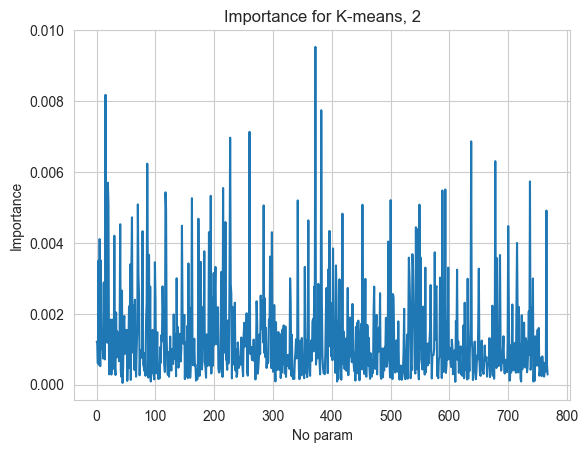

,var_no,inform,cum_inf
372,var_372,0.009533,0.009533
15,var_15,0.008180,0.017713
382,var_382,0.007745,0.025458
260,var_260,0.007136,0.032593
227,var_227,0.006969,0.039563
637,var_637,0.006867,0.046429
678,var_678,0.006308,0.052737
86,var_86,0.006237,0.058974
737,var_737,0.005737,0.064711
19,var_19,0.005699,0.070410


In [24]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(agg_cosine_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(agg_cosine_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(agg_cosine_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)

draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

# Agglomerative, L1, num_clusters=5

In [25]:
agg_l1_model = AgglomerativeClustering(n_clusters=5, metric="l1", linkage="complete").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), agg_l1_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), agg_l1_model.labels_))

{'LO < RI': 0.6455114822546972, 'RI < LO': 0.0, 'RI = LO': 0.7281167108753316}
0.6991207282441931


[0.03982113 0.4555655  0.04426058 0.04545292 0.05135906 0.0638344
 0.01859788 0.15500683 0.03307245 0.01616318 0.03989333 0.0096597
 0.02722436 0.02750684 0.0095976  0.17725414 0.02219665 0.04791013
 0.03917712 0.03223403 0.02896783 0.03652732 0.01649023 0.03420168
 0.01905927 0.00931628 0.02616    0.00905392 0.03439067 0.00644082
 0.03722428 0.03245333 0.00508597 0.01718412 0.01634768 0.01913372
 0.00744487 0.02466636 0.02394931 0.01449875 0.07733181 0.01339292
 0.00419226 0.06073815 0.00283242 0.00425768 0.05991897 0.05088929
 0.03647587 0.0053158  0.02211927 0.07820867 0.01149246 0.02795368
 0.02756882 0.01041222 0.01281984 0.01532972 0.02794501 0.13580313
 0.06294962 0.0307556  0.04053056 0.02781961 0.00641428 0.01631155
 0.00369599 0.00672077 0.01386158 0.03490284 0.26563078 0.23290229
 0.01974106 0.01442641 0.02415192 0.01011408 0.01100057 0.02418654
 0.12124941 0.01498919 0.0155286  0.02502296 0.00389309 0.02334679
 0.1035212  0.0792994  0.20498525 0.01164238 0.01493931 0.030050

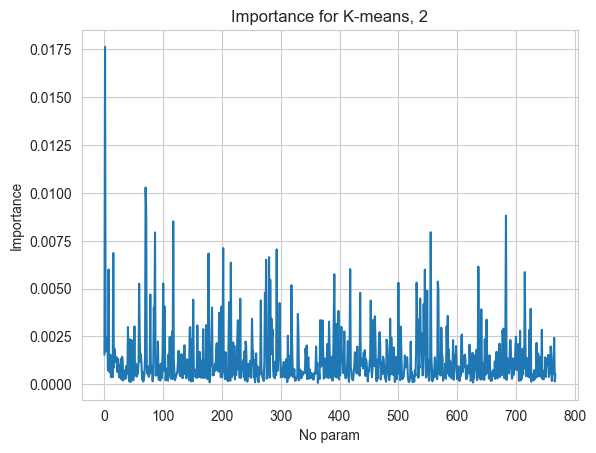

,var_no,inform,cum_inf
1,var_1,0.017631,0.017631
70,var_70,0.010280,0.027912
71,var_71,0.009014,0.036925
683,var_683,0.008814,0.045739
117,var_117,0.008517,0.054256
555,var_555,0.007946,0.062202
86,var_86,0.007933,0.070136
202,var_202,0.007113,0.077248
293,var_293,0.007050,0.084298
15,var_15,0.006860,0.091158


In [26]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(agg_l1_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(agg_l1_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(agg_l1_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)
print(feature_importance.numpy())
draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

# Agglomerative, L2, num_clusters=5

In [27]:
agg_l2_model = AgglomerativeClustering(n_clusters=5, metric="l2", linkage="complete").fit(data_embed)

print(calculate_clustering_accuracy_per_class(np.array(class_RI_LO), agg_l2_model.labels_))
print(calculate_clustering_accuracy(np.array(class_RI_LO), agg_l2_model.labels_))

{'LO < RI': 0.644258872651357, 'RI < LO': 0.0, 'RI = LO': 0.7347480106100795}
0.7260306952049111


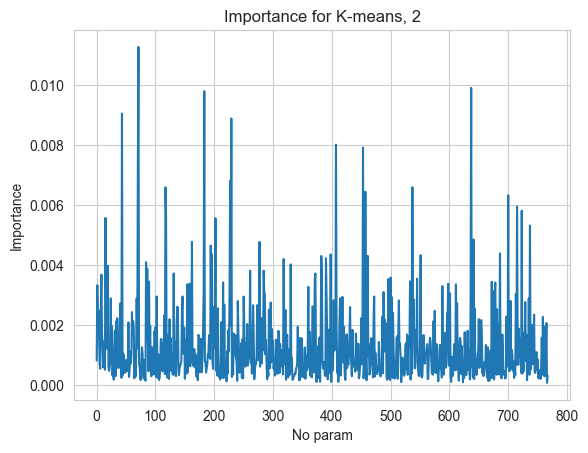

,var_no,inform,cum_inf
71,var_71,0.011263,0.011263
637,var_637,0.009898,0.021161
183,var_183,0.009790,0.030951
43,var_43,0.009042,0.039993
229,var_229,0.008880,0.048873
407,var_407,0.008010,0.056883
453,var_453,0.007909,0.064792
70,var_70,0.007328,0.072120
227,var_227,0.006805,0.078925
537,var_537,0.006594,0.085519


In [28]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(len(set(agg_l2_model.labels_)), activation='softmax')
])

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(agg_l2_model.labels_), epochs=100, verbose=0)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(agg_l2_model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)

draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 2"
)
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)